# [自然语言处理入门](https://github.com/FudanNLP/nlp-beginner)

## 任务一：基于机器学习的文本分类

实现基于logistic/softmax regression的文本分类

1. 参考
   1. [文本分类](文本分类.md)
   2. 《[神经网络与深度学习](https://nndl.github.io/)》 第2/3章
2. 数据集：[Classify the sentiment of sentences from the Rotten Tomatoes dataset](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)
3. 实现要求：NumPy
4. 需要了解的知识点：

   1. 文本特征表示：Bag-of-Word，N-gram
   2. 分类器：logistic/softmax  regression，损失函数、（随机）梯度下降、特征选择
   3. 数据集：训练集/验证集/测试集的划分
5. 实验：
   1. 分析不同的特征、损失函数、学习率对最终分类性能的影响
   2. shuffle 、batch、mini-batch 
6. 时间：两周

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/NaturalLanguageProcessing/nlp-beginner/task-1

1-gram.ipynb			 data			    softmax.ipynb
basic-text-classification.ipynb  deep-neural-network.ipynb


### 线性回归

In [ ]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

# 读取 TSV 文件并转成 Dataset
def load_dataset(path):
  data = pd.read_csv(path, delimiter='\t', encoding='utf-8')
  return tf.data.Dataset.from_tensor_slices((data['Phrase'].values, data['Sentiment'].values))

Version:  2.4.1
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


In [ ]:
TRAIN_FILE_PATH='/content/drive/MyDrive/NaturalLanguageProcessing/nlp-beginner/task-1/data/train.tsv'

# 读取文件
dataset = load_dataset(TRAIN_FILE_PATH)

In [ ]:
# 准备数据
data = []
label = []
for feat, targ in dataset.take(156000):
  data.append(tfds.as_numpy(feat))
  if tfds.as_numpy(targ) > 2:
    label.append(1)
  else:
    label.append(0)

In [ ]:
# 划分训练集与测试集
train_examples = data[:150000]
train_labels = label[:150000]
test_examples = data[150000:]
test_labels = label[150000:]

In [ ]:
# 使用神经网络语言模型，50 维词向量
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
#
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_examples[:20000]
partial_x_train = train_examples[20000:]

y_val = train_labels[:20000]
partial_y_train = train_labels[20000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/5
254/254 [==============================] - 121s 475ms/step - loss: 0.5742 - accuracy: 0.7254 - val_loss: 0.4281 - val_accuracy: 0.8232
Epoch 2/5
254/254 [==============================] - 120s 472ms/step - loss: 0.3459 - accuracy: 0.8586 - val_loss: 0.4156 - val_accuracy: 0.8296
Epoch 3/5
254/254 [==============================] - 120s 474ms/step - loss: 0.3036 - accuracy: 0.8759 - val_loss: 0.4185 - val_accuracy: 0.8320
Epoch 4/5
254/254 [==============================] - 122s 480ms/step - loss: 0.2838 - accuracy: 0.8846 - val_loss: 0.4289 - val_accuracy: 0.8305
Epoch 5/5
254/254 [==============================] - 123s 484ms/step - loss: 0.2684 - accuracy: 0.8897 - val_loss: 0.4378 - val_accuracy: 0.8280


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

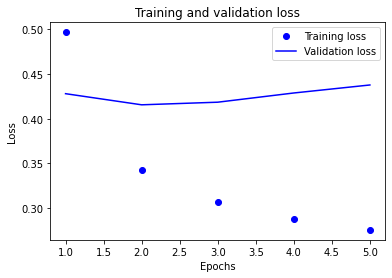

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

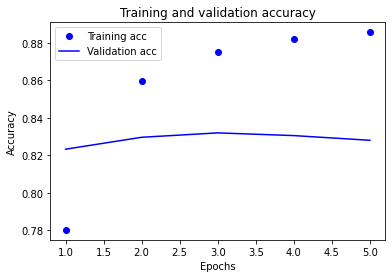

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()